In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv(r'C:\Users\45471\OneDrive\Desktop\deepsolar_tract.csv', encoding = 'latin1')
print("The dataset has " + str(data.shape[0]) + " rows and " + str(data.shape[1]) + " columns.")
data.head()

The dataset has 72537 rows and 169 columns.


,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,1757,336,157,4548,26,3569,0.3490,200,448,98,1720,2527,10,51,0,147.73120,26999.0,6577,44.52005,85,1911,28,19,16,0,6,88,6420,mn,154.37190,136,6.640769,0.073879,0.386324,0.371592,0.125110,0.034521,0.005717,

In [3]:
# select features
selected_features = ['tile_count', 
                   'tile_count_residential', 
                   'total_panel_area_residential',
                   'solar_panel_area_divided_by_area', 
                   'solar_panel_area_per_capita',
                   'solar_system_count_residential', 
                   'solar_system_count_nonresidential',
                   'number_of_solar_system_per_household', 
                   'number_of_years_of_education',
                   'diversity', 
                   'average_household_income', 
                   'county', 
                   'employed', 
                   'gini_index',
                   'land_area', 
                   'per_capita_income', 
                   'population', 
                   'population_density',
                   'state', 
                   'total_area', 
                   'water_area', 
                   'employ_rate', 
                   'poverty_family_below_poverty_level_rate',
                   'heating_fuel_solar_rate', 
                   'median_household_income', 
                   'household_count',
                   'average_household_size', 
                   'housing_unit_count', 
                   'housing_unit_occupied_count',
                   'housing_unit_median_value', 
                   'housing_unit_median_gross_rent', 
                   'age_18_24_rate',
                   'age_25_34_rate',
                   'age_more_than_85_rate', 
                   'age_75_84_rate', 
                   'age_35_44_rate',
                   'age_45_54_rate',
                   'age_65_74_rate', 
                   'age_55_64_rate', 
                   'age_10_14_rate', 
                   'age_15_17_rate', 
                   'age_5_9_rate',
                   'household_type_family_rate', 
                   'dropout_16_19_inschool_rate', 
                   'mortgage_with_rate',
                   'occupancy_vacant_rate', 
                   'occupancy_owner_rate', 
                   'age_median', 
                   'travel_time_average',
                   'health_insurance_public_rate', 
                   'health_insurance_none_rate', 
                   'daily_solar_radiation',
                   'net_metering',
                   'feedin_tariff',
                   'cooperate_tax', 
                   'property_tax', 
                   'sales_tax',
                   'rebate',
                   'avg_electricity_retail_rate']


In [4]:
# Size of data
data = data[selected_features]
print('Selected data has %d rows and %d columns' % (data.shape[0], data.shape[1]))

Selected data has 72537 rows and 59 columns


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72537 entries, 0 to 72536
Data columns (total 59 columns):
tile_count                                 72537 non-null float64
tile_count_residential                     72537 non-null float64
total_panel_area_residential               72537 non-null float64
solar_panel_area_divided_by_area           72513 non-null float64
solar_panel_area_per_capita                72074 non-null float64
solar_system_count_residential             72537 non-null float64
solar_system_count_nonresidential          72537 non-null float64
number_of_solar_system_per_household       71991 non-null float64
number_of_years_of_education               71930 non-null float64
diversity                                  71940 non-null float64
average_household_income                   71651 non-null float64
county                                     72537 non-null object
employed                                   72537 non-null int64
gini_index                          

In [6]:
# residential area that deployed solar system
data = data.loc[data['tile_count_residential'] > 0]
print('the shape of data table of residents with solar panels installed is %d rows and %d columns' % (data.shape[0], data.shape[1]))

the shape of data table of residents with solar panels installed is 53529 rows and 59 columns


In [7]:
data.head()

,tile_count,tile_count_residential,total_panel_area_residential,solar_panel_area_divided_by_area,solar_panel_area_per_capita,solar_system_count_residential,solar_system_count_nonresidential,number_of_solar_system_per_household,number_of_years_of_education,diversity,average_household_income,county,employed,gini_index,land_area,per_capita_income,population,population_density,state,total_area,water_area,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_solar_rate,median_household_income,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,mortgage_with_rate,occupancy_vacant_rate,occupancy_owner_rate,age_median,travel_time_average,health_insurance_public_rate,health_insurance_none_rate,daily_solar_radiation,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
1,25.0,17.0,297.274652,17.801218,0.037067,15.0,6.0,0.006726,14.192188,0.145934,61727.085202,Stearns County,4795,0.4074,16.616790,20951.0,8020,482.6443,mn,16.699680,0.082887,0.953660,0.139073,0.0,49778.0,2230,2.75,2356,2230,157000.0,733.0,0.377182,0.108603,0.009975,0.039526,0.095885,0.091521,0.034040,0.060973,0.036284,0.024314,0.061721,0.609417,0.966867,0.644320,0.053480,0.683786,21.9,22.0,0.245761,0.043890,NaN,34,0,0,25,12,0,9.46
2,3.0,3.0,64.505776,1.640095,0.009253,3.0,0.0,0.001112,13.647991,0.009150,71496.886583,Stearns County,3550,0.3926,37.444820,28021.0,6971,186.1673,mn,39.330500,1.885683,0.959200,0.068332,0.0,63355.0,2698,2.55,2909,2698,182400.0,692.0,0.079902,0.093817,0.032277,0.050782,0.120069,0.151485,0.079759,0.114474,0.100273,0.057381,0.065701,0.726835,0.989605,0.640390,0.072534,0.776212,39.6,21.0,0.255264,0.037171,3.76,34,0,0,25,12,0,9.46
4,5.0,4.0,61.050581,1.368842,0.011598,4.0,1.0,0.002087,13.850956,0.090766,89135.315597,Stearns County,2887,0.4463,44.001510,32770.0,5264,119.6323,mn,44.600170,0.598656,0.949359,0.049559,0.0,68401.0,1917,2.74,2004,1917,208600.0,882.0,0.090616,0.142477,0.005509,0.028875,0.120631,0.149506,0.060410,0.128609,0.049962,0.039704,0.103723,0.768388,0.946565,0.601471,0.043413,0.678643,34.5,25.0,0.272710,0.023424,3.76,34,0,0,25,12,0,9.46
6,2.0,2.0,25.299013,49.002875,0.007220,2.0,0.0,0.004255,14.404110,0.470443,41068.936170,Stearns County,1942,0.7166,0.448182,12750.0,3504,7818.2590,mn,0.516276,0.068095,0.858153,0.149254,0.0,13333.0,470,1.78,559,470,270800.0,512.0,0.804509,0.052226,0.004566,0.013984,0.031393,0.032534,0.010274,0.021689,0.001427,0.017979,0.008847,0.142553,0.995921,0.741935,0.159213,0.055456,20.0,15.0,0.170366,0.044091,3.76,34,0,0,25,12,0,9.46
9,11.0,9.0,283.951203,35.169588,0.033390,9.0,1.0,0.002742,14.254816,0.120052,82502.407069,Stearns County,4702,0.3588,7.873874,31691.0,8504,1080.0270,mn,8.073771,0.199898,0.981628,0.006876,0.0,71591.0,3282,2.59,3566,3282,173700.0,1006.0,0.059384,0.188147,0.007526,0.037747,0.153104,0.106068,0.063147,0.085254,0.093133,0.031162,0.085489,0.709019,1.000000,0.785780,0.079641,0.611329,32.3,21.0,0.238342,0.065591,3.76,34,0,0,25,12,0,9.46


In [8]:
data.describe()

,tile_count,tile_count_residential,total_panel_area_residential,solar_panel_area_divided_by_area,solar_panel_area_per_capita,solar_system_count_residential,solar_system_count_nonresidential,number_of_solar_system_per_household,number_of_years_of_education,diversity,average_household_income,employed,gini_index,land_area,per_capita_income,population,population_density,total_area,water_area,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_solar_rate,median_household_income,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,mortgage_with_rate,occupancy_vacant_rate,occupancy_owner_rate,age_median,travel_time_average,health_insurance_public_rate,health_insurance_none_rate,daily_solar_radiation,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
count,53529.000000,53529.000000,53529.000000,53512.000000,5.352900e+04,53529.000000,53529.000000,5.352900e+04,53389.000000,53395.000000,53244.000000,53529.000000,53264.000000,53512.000000,53373.000000,53529.000000,53511.000000,53512.000000,53512.000000,53343.000000,53270.000000,53304.000000,53201.000000,53529.000000,53280.000000,53529.000000,53529.000000,5.265600e+04,52373.000000,53395.000000,53395.000000,53395.000000,53395.000000,53395.000000,53395.000000,53395.000000,53395.000000,53395.000000,53395.000000,53395.000000,53304.000000,53067.000000,53107.000000,53315.000000,53315.000000,53378.000000,53280.000000,53344.000000,53344.000000,49449.000000,53529.000000,53529.000000,53529.000000,53529.000000,53529.000000,53529.000000,53529.000000
mean,40.662688,29.076220,617.478525,487.293995,inf,23.871061,3.438473,inf,13.638726,0.323875,77839.266909,2165.073680,0.420269,26.551906,30218.332490,4642.219937,4861.421780,27.152256,0.600350,0.914949,0.118416,0.000590,61318.351986,1705.242317,2.677241,1913.170580,1705.242317,2.464521e+05,1066.634926,0.099581,0.136919,0.020503,0.044825,0.126883,0.138360,0.081079,0.125940,0.063186,0.038742,0.062645,0.661756,0.955893,0.655466,0.103806,0.569231,38.734271,25.313739,0.320950,0.126226,4.322393,14.548955,1.577239,0.471670,18.733210,6.379514,2.389303,10.987519
std,98.267574,69.227671,1504.947253,1040.157447,NaN,55.681505,9.284438,NaN,1.371107,0.194451,39678.967107,1084.085526,0.062582,180.738029,15532.660586,2162.244018,8827.109784,182.494694,5.769652,0.052327,0.110305,0.002788,30159.207767,765.642933,0.524460,870.269773,765.642933,2.037697e+05,445.129738,0.084907,0.060279,0.021336,0.031623,0.034784,0.036701,0.041706,0.039561,0.025452,0.017174,0.025138,0.142675,0.083560,0.141457,0.092967,0.216339,7.685792,6.693020,0.127795,0.083939,0.585508,8.569840,3.494479,2.459769,16.384267,10.400960,4.216462,2.653185
min,1.000000,1.000000,1.813267,0.001006,3.542230e-04,1.000000,0.000000,8.119519e-05,8.000000,0.000000,6910.984848,0.000000,0.006600,0.000000,128.000000,0.000000,0.000000,0.019939,0.000000,0.000000,0.000000,0.000000,3271.000000,0.000000,1.020000,0.000000,0.000000,9.999000e+03,164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.300000,1.000000,0.000000,0.000000,3.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.250000
25%,3.000000,2.000000,43.002538,11.878395,1.063776e-02,2.000000,0.000000,1.282051e-03,12.723230,0.153070,52052.944638,1433.000000,0.377900,0.718702,20182.000000,3213.000000,666.869950,0.747285,0.000000,0.892086,0.038462,0.000000,40417.000000,1189.000000,2.340000,1335.000000,1189.000000,1.192000e+05,751.000000,0.064501,0.099061,0.007975,0.025197,0.106251,0.116653,0.055402,0.100518,0.046959,0.027351,0.046662,0.585249,0.940765,0.574460,0.046263,0.424373,33.500000,21.0

In [9]:
# Ratio of null values in columns
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)[0:5]

daily_solar_radiation             0.076220
housing_unit_median_gross_rent    0.021596
housing_unit_median_value         0.016309
dropout_16_19_inschool_rate       0.008631
mortgage_with_rate                0.007884
dtype: float64

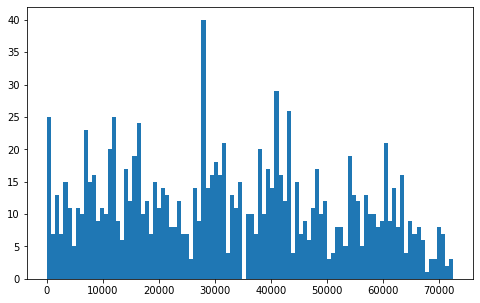

In [10]:
# Plot histogram of how many null values per row for the "housing_unit_median_gross_rent" feature. 
y = data[data['housing_unit_median_gross_rent'].isnull() == 1].housing_unit_median_gross_rent.index
x = range(1, len(y)+1)
plt.figure(figsize=(8, 5))
a = plt.hist(y, 100)

In [11]:
# impute the daily solar radiation according to the mean per county
county_list = data.county.value_counts().index

for county in county_list:
    tmp = data[data['county' ] == county]
    a = tmp['daily_solar_radiation'].fillna( tmp['daily_solar_radiation'].mean())
    data.loc[a.index, 'daily_solar_radiation'] = a.values

# If the mean was also a NaN (Can happen if county has only one entry without solar radiation data)
# We throw away the rows
print('Remaining NaN values is "daily_solar_radiation": %d' % (np.sum(data['daily_solar_radiation'].isnull() == 1)))

Remaining NaN values is "daily_solar_radiation": 16


In [12]:
orig_num_rows = data.shape[0]
data = data.dropna()
new_num_rows = data.shape[0]
print('%2.2f%% (%d of %d) of rows removed due to NaN values.' % 
      ((orig_num_rows-new_num_rows)*100/orig_num_rows, (orig_num_rows-new_num_rows), orig_num_rows))

3.76% (2015 of 53529) of rows removed due to NaN values.


In [13]:
data.max()

tile_count                                          4468
tile_count_residential                              1795
total_panel_area_residential                     40380.1
solar_panel_area_divided_by_area                 15983.3
solar_panel_area_per_capita                      6.29976
solar_system_count_residential                      1404
solar_system_count_nonresidential                    397
number_of_solar_system_per_household            0.559701
number_of_years_of_education                      18.615
diversity                                       0.812441
average_household_income                          537130
county                                     Zapata County
employed                                           24075
gini_index                                        0.7955
land_area                                        9489.73
per_capita_income                                 213267
population                                         53812
population_density             

In [14]:
# create a new column for solar density, deployed solar systems (residential) per Thousands households.
data['sol_density'] = (data['solar_system_count_residential'] / data['household_count']) * 1000

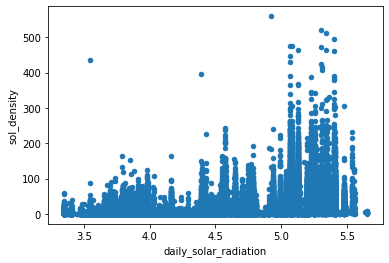

In [15]:
# scatter of density vs. radiation
data.plot.scatter( x = 'daily_solar_radiation', y = 'sol_density')

In [16]:
def CalcSolarDensityVsMeanOfColumn( df, col_name, col_grid ):
    '''
    INPUT:
    df - A pandas dataframe from the DeepSolar dataframe
    col_name - some numerical column in the dataframe other than 'sol_density'
    col_grid - A grid of values that the column will be quantized into. e.g. the grid can be:
               [0,1,2,3,...,100] and all values of the column will be rounded to the nearest grid point.
    OUTPUT:
    An array of the AVERAGED solar systems installations per thousand households across the grid point. 
    The function help plotting the 'sol_density' column vs. Other columns. How? Since we have a lot of data, a straight
    forward scatter plot looks bad. Instead, we take any data column and reduce the number of points within it by "binning" of it's values
    to a smaller grid. (Just like in a histogram). Then, per each bin, we calculate an average of all 'sol_density' values we have.
    '''
    
    # Init empty result list
    solar_systems_per_thousand_households = []
    
    # Quantize the column value according to the supplied grid, get back the indices
    indices = np.digitize( df[col_name], np.sort(col_grid) )
    
    # Go over grid values
    for val in range(1,len(col_grid)+1):
        
        # Get susbset of table 
        tmp = df.loc[ indices == val]
        
        # Append the mean of solar systems density
        solar_systems_per_thousand_households.append(np.mean(tmp['sol_density']))    

    return solar_systems_per_thousand_households

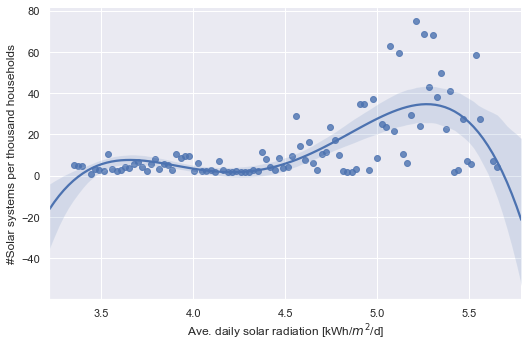

In [17]:
# calc the average density per each level of daily solar radiation
n_grid_points = 100
x = np.linspace(data['daily_solar_radiation'].min(), data['daily_solar_radiation'].max(), n_grid_points)
y = CalcSolarDensityVsMeanOfColumn(data, 'daily_solar_radiation', x)

# Plot
d = {"Ave. daily solar radiation [kWh/$m^2$/d]": x, "#Solar systems per thousand households": y}
sns.set(font_scale = 1)
sns.lmplot(x = "Ave. daily solar radiation [kWh/$m^2$/d]", y = "#Solar systems per thousand households",
           data = pd.DataFrame(d), ci = 95, order = 4, aspect = 1.5)

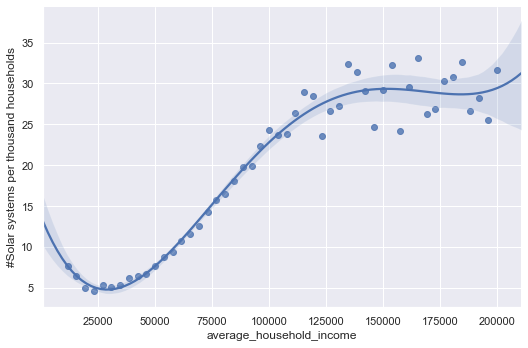

In [18]:
# Average income
# calc the average density per each level of daily solar radiation
n_grid_points = 50
col_name = 'average_household_income'

x = np.linspace(data[col_name].min(), 200e3 ,n_grid_points)
y = CalcSolarDensityVsMeanOfColumn(data, col_name, x)

# Plot
d = {col_name: x, "#Solar systems per thousand households": y}
sns.set(font_scale = 1)
sns.lmplot(x = col_name, y = "#Solar systems per thousand households",
           data = pd.DataFrame(d), ci = 95, order = 4, aspect = 1.5)

[10, 18, 0, 30]

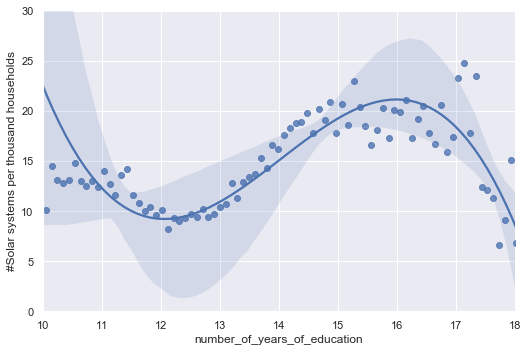

In [19]:
# Education years
n_grid_points = 100
col_name = 'number_of_years_of_education'

x = np.linspace(data[col_name].min(), data[col_name].max() ,n_grid_points)
y = CalcSolarDensityVsMeanOfColumn(data, col_name, x)

# Plot
d = {col_name: x, "#Solar systems per thousand households": y}
sns.set(font_scale = 1)
fgrid = sns.lmplot(x = col_name, y = "#Solar systems per thousand households",
                   data = pd.DataFrame(d), ci = 95, order = 3, aspect = 1.5)
ax = fgrid.axes[0][0]
ax.axis([10, 18, 0, 30])

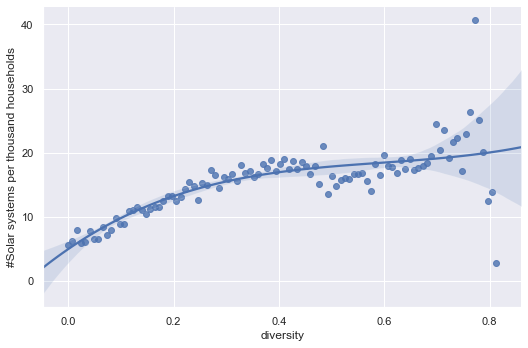

In [20]:
# Diversity index
n_grid_points = 100
col_name = 'diversity'

x = np.linspace(data[col_name].min(), data[col_name].max() ,n_grid_points)
y = CalcSolarDensityVsMeanOfColumn(data, col_name, x)

# Plot
d = {col_name: x, "#Solar systems per thousand households": y}
sns.set(font_scale = 1)
sns.lmplot(x = col_name, y = "#Solar systems per thousand households",
           data = pd.DataFrame(d), ci = 95, order = 3, aspect = 1.5)

# The more diverse the area the less solar installations. Index is probability that sampling of 2 people will have the same race. If low, means high diversity. If high, means low diversity. 
# This means that we need to further segment according to race to check who are installing the most.

[10, 100000.0, 0, 25]

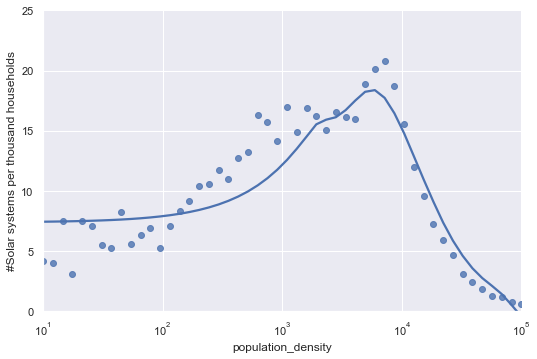

In [21]:
# Diversity index
n_grid_points = 50
col_name = 'population_density'

x = np.logspace(1,5 ,n_grid_points)
y = CalcSolarDensityVsMeanOfColumn(data, col_name, x)

# Plot
d = {col_name: x, "#Solar systems per thousand households": y}
fgrid = sns.lmplot(x = col_name, y = "#Solar systems per thousand households",
           data = pd.DataFrame(d), lowess = True, aspect = 1.5)
ax = fgrid.axes[0][0]
ax.set_xscale('log')
ax.axis([10, 1e5, 0, 25])

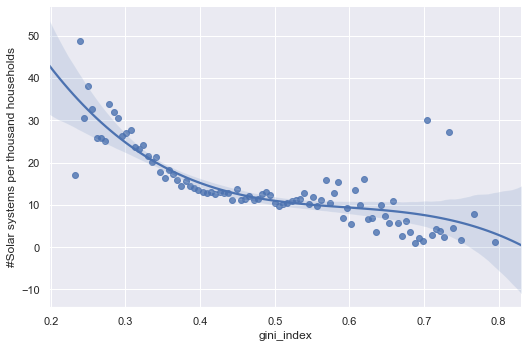

In [22]:
# Diversity index
n_grid_points = 100
col_name = 'gini_index'

x = np.linspace(data[col_name].min(), data[col_name].max(), n_grid_points)
y = CalcSolarDensityVsMeanOfColumn(data, col_name, x)

# Plot
d = {col_name: x, "#Solar systems per thousand households": y}
sns.set(font_scale = 1)
sns.lmplot(x = col_name, y = "#Solar systems per thousand households",
           data = pd.DataFrame(d), ci = 95, order = 3, aspect = 1.5)

In [23]:
def RandomForestRegressorWithKFold(X, y, n_splits, random_state):
    '''
    INPUT:
    X - A pandas dataframe from the DeepSolar dataframe. 
    y - A different feature not included in 'X' that we want to predict. 
    n_splits - Number of splits for KFold that is performed within the function. 
    random_state - the random state used for KFold that is performed within the function.
    OUTPUT: 
    (NOTICE - The returned values are for the highest R2 score)
    model - The model after training
    y_test - The test set labels (actually values)
    y_test_preds - The predicted labels( actually values). 
    The function uses a simple RandomForestRegressor combined with a KFold splitting of the data for performing regression. 
    on some target variable. The function then prints the R2 metric for each split and the average for all splits. 
    '''
        
    # Init
    r2_score_list = []
    model_tmp_list = []
    y_test_preds_list = []
    y_test_list = []
        
    # Split data into n_splits, where n_splits-1 are for training and 1 split for testing. 
    kf = KFold(n_splits = n_splits, random_state = random_state, shuffle=True)
    
    # Go over the training / testing indices from the split
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Generate and fit the RandomForestRegressor() model
        model = RandomForestRegressor() # Instantiate
        model.fit(X_train, y_train)     #Fit

        #Predict and score the model
        y_test_preds = model.predict(X_test) 
        r2_score_list.append( r2_score(y_test, y_test_preds) )
        print( "The R-squared score for the model was %2.5f on %d values." % (r2_score(y_test, y_test_preds), len(y_test)))
        
        # Save values for returning later
        model_tmp_list.append(model)
        y_test_list.append(y_test)
        y_test_preds_list.append(y_test_preds)

    mean_r2_score_list = np.mean( r2_score_list )    
    print('The average R-squared score is: %2.5f' % mean_r2_score_list )
    
    model = model_tmp_list[np.argmax( r2_score_list )]
    y_test_preds = y_test_preds_list[np.argmax( r2_score_list )]
    y_test = y_test_list[np.argmax( r2_score_list )]
    
    return model, y_test_preds, y_test

In [24]:
# First, I want to drop from the dataset columns that might relate to the value I want to predict. (Such as number of solar systems, etc..)
# We want to predict: 'total_panel_area_residential'
columns_to_drop = ['tile_count', 'tile_count_residential', 'total_panel_area_residential',
                   'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',
                   'solar_system_count_residential', 'solar_system_count_nonresidential',
                   'number_of_solar_system_per_household', 'county', 'state', 'sol_density']

X = data.drop( columns_to_drop, axis = 1 )
y = data['total_panel_area_residential']

# We now perform the random forest regression - no need for scaling of data
n_splits = 10
random_state = None
model, y_test_preds, y_test = RandomForestRegressorWithKFold(X, y, n_splits, random_state)

The R-squared score for the model was 0.60365 on 5152 values.
The R-squared score for the model was 0.62298 on 5152 values.
The R-squared score for the model was 0.58467 on 5152 values.
The R-squared score for the model was 0.56160 on 5152 values.
The R-squared score for the model was 0.67930 on 5151 values.
The R-squared score for the model was 0.52530 on 5151 values.
The R-squared score for the model was 0.58760 on 5151 values.
The R-squared score for the model was 0.57374 on 5151 values.
The R-squared score for the model was 0.58428 on 5151 values.
The R-squared score for the model was 0.65196 on 5151 values.
The average R-squared score is: 0.59751


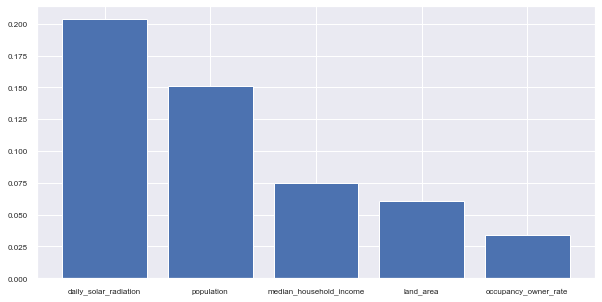

In [25]:
# Let's see the most 5 important features - we sort the feature importances from the RF
N = 5
FONT_SIZE = 8
idxs = np.argsort( model.feature_importances_ )
idxs = np.flip(idxs)[0:N]

# Plot
plt.figure(figsize=(10,5))
plt.bar( list(range(1,N+1)), model.feature_importances_[idxs], tick_label = X.columns[idxs].values )
plt.rc('font', size=FONT_SIZE)         
plt.rc('axes', labelsize=FONT_SIZE)    
plt.tick_params(labelsize=FONT_SIZE)

In [26]:
def MyScatterPlot(x, y, x_string, y_string, ax):
    '''
    INPUT:
    x - some array of numerical values
    y - some array of numerical values
    x_string - a X-axis label 
    y_string - a Y-axis label
    ax - the axis limits in the format [x_min, x_max, y_min, y_max]. Can also be empty.
    OUTPUT:
    None.
    The function generates a scatter plot of the 'x' vs. 'y'.
    '''
    # TODO: Move to utility file + documentation
    LARGE_SIZE = 16
    plt.figure(figsize=(8,5))
    plt.scatter(x, y, color='b', marker='.')
    plt.xlabel(x_string)
    plt.ylabel(y_string)
    plt.grid(which='minor', axis='both')
    plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
    plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
    plt.tick_params(labelsize=LARGE_SIZE)

    if ~(ax == []):
        plt.axis(ax)

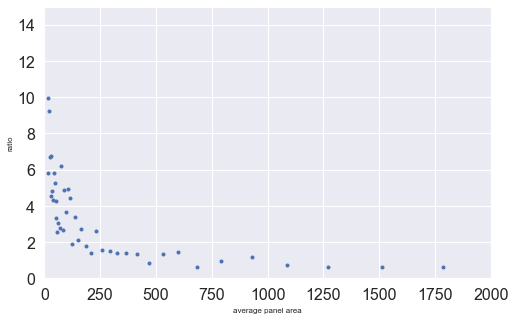

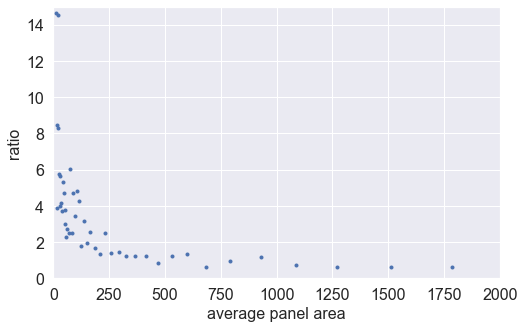

In [27]:
# Here I attempt to estimate the average error and its standard deviation. We see that the smaller the panel area the larger the 
mean_err_list = []
std_list = []
avg_panel_size_list_m2 = []
NS = range( 100, np.floor(len(y)/(n_splits+1)).astype(int), 100 )
num_of_rows_to_check = 100         # We want to check panel area results for 'num_of_rows_to_check' rows.

for ns in NS:
    N = ns + num_of_rows_to_check      # End index
    idxs = np.argsort( y_test ) # Sort the test panel area sizes
    err = y_test.iloc[idxs[ns:N]].values - y_test_preds[idxs[ns:N]] # Calculate the error
    mean_err = np.mean(np.square(err))  # Calculate the MSE (Mean Squared Error)
    std = np.std( err )                 # Calculate the standard deviation
    mean_err_list.append( mean_err )
    std_list.append( std )
    avg_panel_size_m2 = np.mean( y_test.iloc[idxs[ns:N]].values )
    avg_panel_size_list_m2.append( avg_panel_size_m2 )

# Ratio between panel area size to mean error in panel estimation size, and the ratio between the standard deviation to the panel area
MyScatterPlot( avg_panel_size_list_m2, np.sqrt(mean_err_list)/avg_panel_size_list_m2, 'average panel area', 'ratio', [0, 2e3, 0, 15])
MyScatterPlot( avg_panel_size_list_m2, np.divide( std_list, avg_panel_size_list_m2 ), 'average panel area', 'ratio', [0, 2e3, 0, 15])

In [28]:
# We run twice. One time with the panel area information and one time without. 
n_splits = 10
random_state = None
columns_to_keep = [ ['total_panel_area_residential', 'solar_panel_area_divided_by_area','number_of_years_of_education'], 
                    ['number_of_years_of_education']]

for cols in columns_to_keep:
    print('Columns used for inference: %s' % (cols))
    X = data[cols]
    y = data['per_capita_income']
    RandomForestRegressorWithKFold(X, y, n_splits, random_state)

Columns used for inference: ['total_panel_area_residential', 'solar_panel_area_divided_by_area', 'number_of_years_of_education']
The R-squared score for the model was 0.68257 on 5152 values.
The R-squared score for the model was 0.68811 on 5152 values.
The R-squared score for the model was 0.66643 on 5152 values.
The R-squared score for the model was 0.68280 on 5152 values.
The R-squared score for the model was 0.67216 on 5151 values.
The R-squared score for the model was 0.65671 on 5151 values.
The R-squared score for the model was 0.65962 on 5151 values.
The R-squared score for the model was 0.66761 on 5151 values.
The R-squared score for the model was 0.63502 on 5151 values.
The R-squared score for the model was 0.67598 on 5151 values.
The average R-squared score is: 0.66870
Columns used for inference: ['number_of_years_of_education']
The R-squared score for the model was 0.58136 on 5152 values.
The R-squared score for the model was 0.57841 on 5152 values.
The R-squared score for th